### <span style='color:green '>Goal: </span>
#### <span style='color:green '>Analyze the Walmart data to- </span>
*  <span style='color:green '>Identify the characteristics of the users based on Gender, Marital status and Age groups </span>
*  <span style='color:green '>Investigate whether there is a difference in spending patterns between these groups</span>
*  <span style='color:green '>Provide recommendations based on Insights</span>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display_html
import statistics as stat
from scipy.stats import norm

In [2]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
len(df)

550068

In [4]:
# check datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
#number of unique values in the data
for i in df.columns:
    print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


### <span style='color:green '> From the above results, {Purchase, ProductId, User_ID} are Continous data, rest of the columns though Integers should be considered as Categorical data </span>

### Checking the value counts for categorical variables


In [6]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [7]:
df['Age'].value_counts().sort_index()

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [8]:
df['Occupation'].value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [9]:
df['City_Category'].value_counts().sort_index()

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [10]:
df['Stay_In_Current_City_Years'].value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [11]:
df['Marital_Status'].value_counts().sort_index()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [12]:
df['Product_Category'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

In [13]:
# check for NaN values
df.isna().sum()/(df.shape[0]) *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

#### There are no NaN in the dataframe

## Outlier detection and treatment

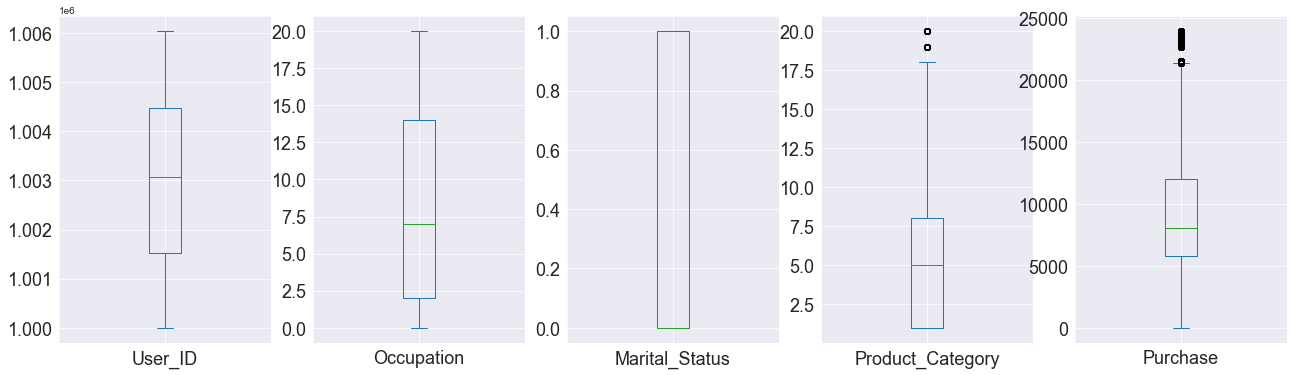

In [14]:
sns.set_style('darkgrid');
df.plot(figsize=(22,6), subplots=True, layout=(1,5), kind='box',fontsize=18 );
sns.set_style('white');

#### Looks like Product_category and Purchase have Outlier values 

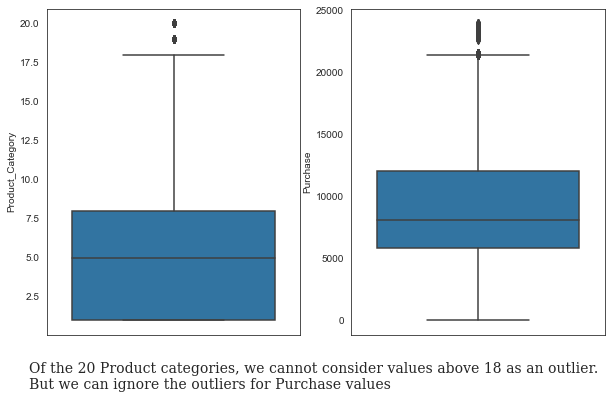

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.boxplot(data=df, y='Product_Category', ax=ax[0])
sns.boxplot(data=df, y='Purchase', ax=ax[1])

observation = '''Of the 20 Product categories, we cannot consider values above 18 as an outlier.
But we can ignore the outliers for Purchase values'''
fig.text(0.1, 0, observation, fontsize=14, fontweight='light', fontfamily='serif')
plt.show()

In [15]:
# Outlier removal for 'Purchase'
Q3 = np.percentile( df['Purchase'] , 75)
Q1 = np.percentile( df['Purchase'] , 25)
IQR = Q3-Q1
upperBound = Q3 + 1.5*IQR

In [16]:
print("Removing", df[df.Purchase > upperBound].value_counts().shape[0], "rows equivalent to", df[df.Purchase > upperBound].value_counts().shape[0] / df.shape[0] * 100, "% of overall data points  " )


Removing 2677 rows equivalent to 0.4866671029763593 % of overall data points  


In [17]:
df= df[df.Purchase < upperBound]
print( "Size of data without outliers is ", len(df))

Size of data without outliers is  547391


In [22]:
df['User_ID'].value_counts()

1001680    1024
1004277     974
1001941     898
1001181     861
1000889     817
           ... 
1002690       7
1004991       7
1002111       7
1005391       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Observation: There are 5891 unique users in the data-set provided, which means Users have made multiple transactions in Walmart


---
##  Computing the mean-purchase amount for a population of 50 million users (using CLT) 
###  <span style='color:green '> The CSV data shows Purchase details per transaction level. However, as observed above, a User can have multiple transactions too. So I'll analyse the data in two ways - </span>
*  <span style='color:green '>by computing Mean-purchase amount for Gender/ Martial_status/ Age_group based on "_*Unique transactions*_" </span>
    
*  <span style='color:green '> by computing Mean-purchase amount for Gender/ Martial_status/ Age_group based on "_*Unique Users*_" </span>

## <span style='background:yellow'>Analysis on the spending pattern of "Gender" based on 'Unique users'</span>

In [77]:
# Grouping the users
uniqueUsers_df = df.groupby( by=['User_ID', 'Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']).sum().reset_index()
uniqueUsers_df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,F,0-17,10,A,2,0,213,334093
1,1000002,M,55+,16,C,4+,0,354,810472
2,1000003,M,26-35,15,A,3,0,93,341635
3,1000004,M,46-50,7,B,2,1,33,206468
4,1000005,M,26-35,20,A,1,1,659,821001
...,...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,3180,4069279
5887,1006037,F,46-50,1,C,4+,0,928,1095824
5888,1006038,F,55+,1,C,2,0,83,90034
5889,1006039,F,46-50,0,B,4+,1,419,542672


In [78]:
len(uniqueUsers_df)

5891

In [79]:
uniqueUsers_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

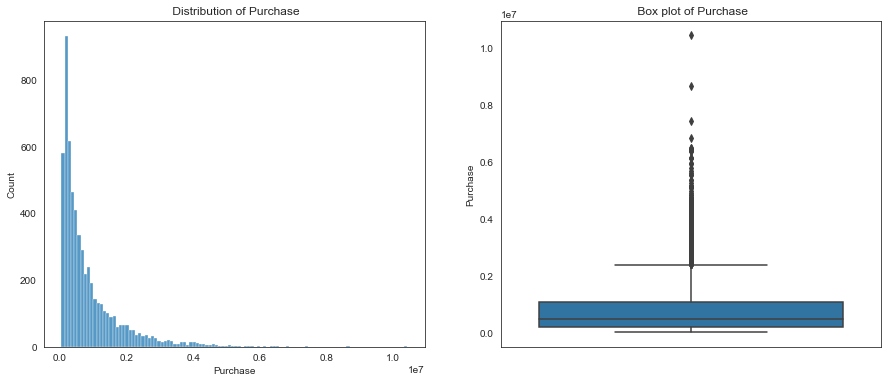

In [80]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.histplot(data=uniqueUsers_df, x='Purchase', ax= ax[0]);
sns.boxplot(data= uniqueUsers_df, y = 'Purchase', ax = ax[1])
ax[0].set_title(' Distribution of Purchase')
ax[1].set_title(' Box plot of Purchase');

In [70]:
# Removing the outliers for 'Purchase' in the uniqueUsers data frame
Q3 = np.percentile( uniqueUsers_df['Purchase'] , 75)
Q1 = np.percentile( uniqueUsers_df['Purchase'] , 25)
IQR = Q3-Q1
upperBound = Q3 + 1.5*IQR
upperBound

2407702.5

In [81]:
print("Filtering", uniqueUsers_df[uniqueUsers_df.Purchase > upperBound].value_counts().shape[0], "rows equivalent to", uniqueUsers_df[uniqueUsers_df.Purchase > upperBound].value_counts().shape[0] / uniqueUsers_df.shape[0] * 100, "% of overall data points  " )


Filtering 417 rows equivalent to 7.078594466134781 % of overall data points  


In [82]:
print( 'Before Outlier removal, data size of Unique Users:',  len(uniqueUsers_df))

Before Outlier removal, data size of Unique Users: 5891


In [85]:
uniqueUsers_df = uniqueUsers_df[uniqueUsers_df.Purchase < upperBound]

In [86]:
print( 'After Outlier removal, data size of Unique Users:',  len(uniqueUsers_df))

After Outlier removal, data size of Unique Users: 5474


In [87]:
uniqueUsers_df.Gender.value_counts()

M    3890
F    1584
Name: Gender, dtype: int64

In [50]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

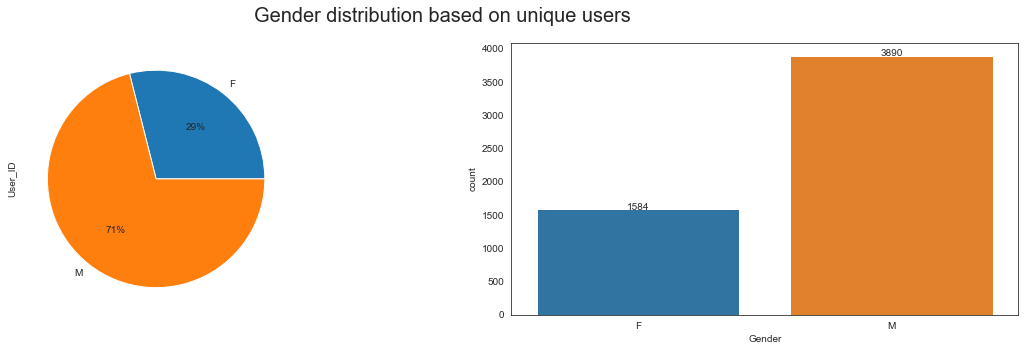

In [88]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Gender distribution based on unique users', fontsize=20)

plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
uniqueUsers_df.groupby('Gender')['User_ID'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%');
plt.subplot(122)
sns.countplot(data = uniqueUsers_df, x = 'Gender');
addlabels(uniqueUsers_df.groupby('Gender')['User_ID'].count().index, uniqueUsers_df.groupby('Gender')['User_ID'].count().tolist())

#### Extracting Purchase values of Male and Female customers

In [89]:
malePurchaseValues = uniqueUsers_df[uniqueUsers_df.Gender == 'M']['Purchase'].to_list()

In [ ]:
femalePurchaseValues = uniqueUsers_df[uniqueUsers_df.Gender == 'F']['Purchase'].to_list()

## **CLT method**

In [245]:
## cental limit theorem 
def sample_mean_calculator(x, sampleSize, n):
    sample_means = []
    for i in range(n):
        x_sample = np.random.choice(x, size=sampleSize)
        sample_means.append(stat.mean(x_sample))
    
    return sample_means

### use Central limit theorem with a sample size of 1000 for samples of 1000 ,5000, 10000, 30000

In [95]:
malePurchaseSamples_1k = sample_mean_calculator(malePurchaseValues, 1000, 1000)

In [96]:
femalePurchaseSamples_1k = sample_mean_calculator(femalePurchaseValues, 1000, 1000)

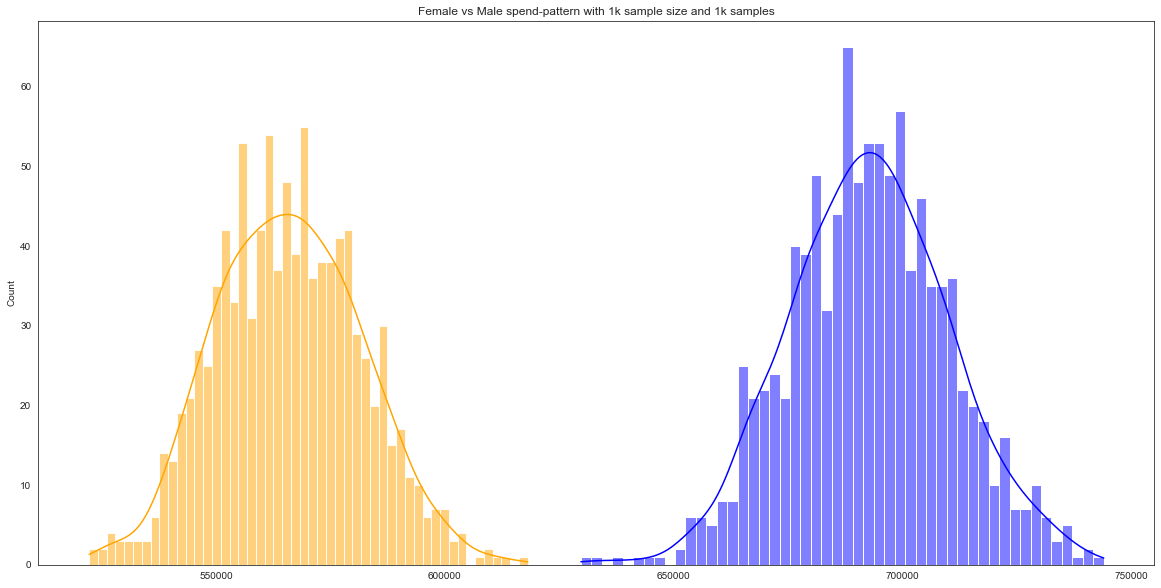

In [159]:
plt.figure(figsize=(20, 10))
sns.histplot(malePurchaseSamples_1k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(femalePurchaseSamples_1k, bins=50, kde=True, legend=True, color='orange').set(title='Female vs Male spend-pattern with 1k sample size and 1k samples');

In [103]:
malePurchaseSamples_5k = sample_mean_calculator(malePurchaseValues, 1000, 5000)

In [104]:
femalePurchaseSamples_5k = sample_mean_calculator(femalePurchaseValues, 1000, 5000)

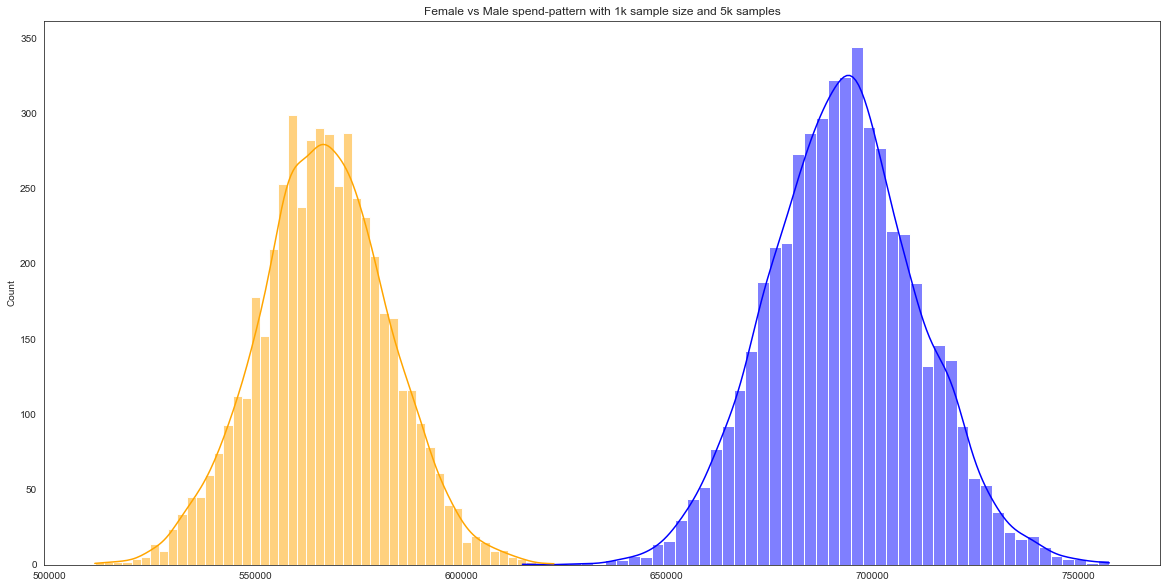

In [160]:
plt.figure(figsize=(20, 10))
sns.histplot(malePurchaseSamples_5k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(femalePurchaseSamples_5k, bins=50, kde=True, legend=True, color='orange').set(title='Female vs Male spend-pattern with 1k sample size and 5k samples');

In [106]:
malePurchaseSamples_10k = sample_mean_calculator(malePurchaseValues, 1000, 10000)

In [107]:
femalePurchaseSamples_10k = sample_mean_calculator(femalePurchaseValues, 1000, 10000)

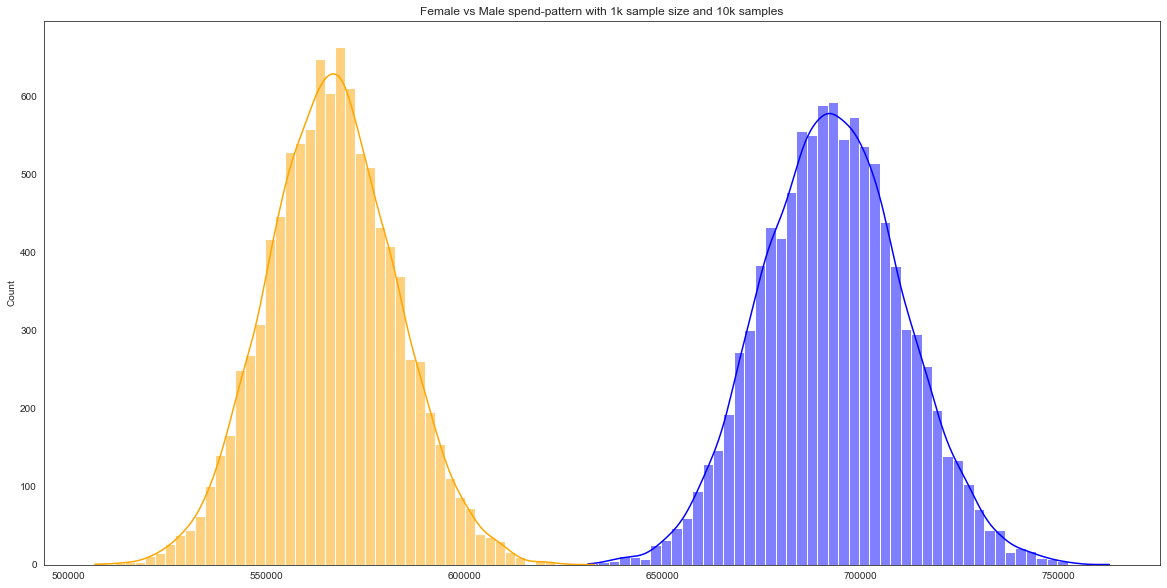

In [161]:
plt.figure(figsize=(20, 10))
sns.histplot(malePurchaseSamples_10k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(femalePurchaseSamples_10k, bins=50, kde=True, legend=True, color='orange').set(title='Female vs Male spend-pattern with 1k sample size and 10k samples');

In [109]:
malePurchaseSamples_30k = sample_mean_calculator(malePurchaseValues, 1000, 30000)

In [110]:
femalePurchaseSamples_30k = sample_mean_calculator(femalePurchaseValues, 1000, 30000)

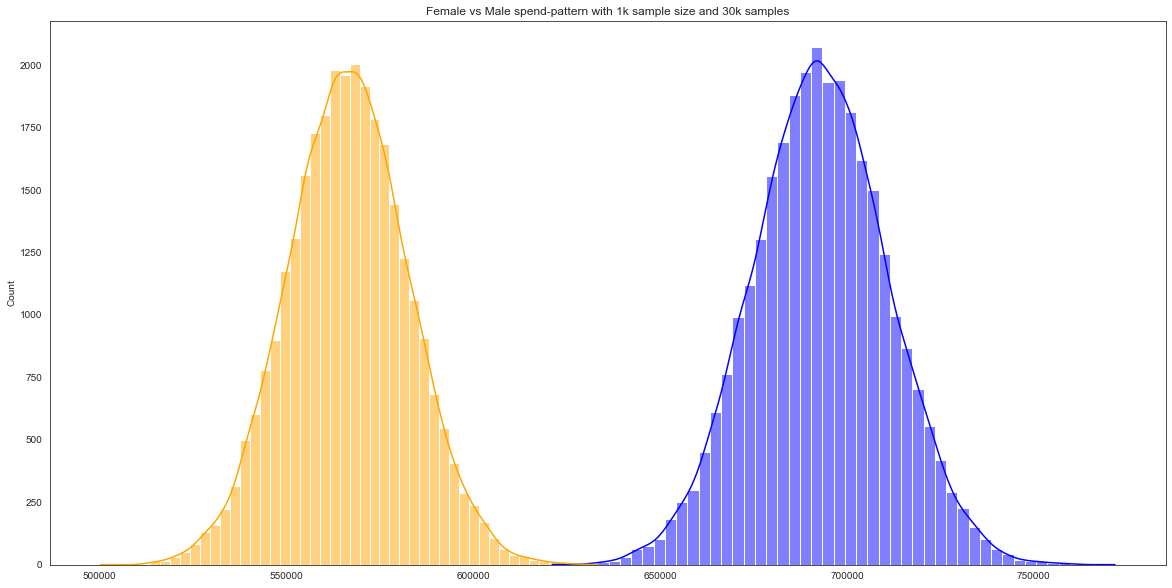

In [162]:
plt.figure(figsize=(20, 10))
sns.histplot(malePurchaseSamples_30k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(femalePurchaseSamples_30k, bins=50, kde=True, legend=True, color='orange').set(title='Female vs Male spend-pattern with 1k sample size and 30k samples');

## Clearly, CLT distribution curve smoothens out with inclreasing samples, and there is a clear distinction between the graphs for Female and Male users 

## Computing 95% Confidence interval levels for Female and Male purchase values by considering 30k samples-

In [131]:
print( '95% CI range for Female users: (', np.percentile( femalePurchaseSamples_30k, 5), ",", np.percentile( femalePurchaseSamples_30k, 95) ,")")
print( '95% CI range for Male users:   (', np.percentile( malePurchaseSamples_30k, 5), ",", np.percentile( malePurchaseSamples_30k, 95) ,")")

95% CI range for Female users: ( 540009.8 , 592994.7 )
95% CI range for Male users:   ( 663282.7 , 722632.5 )


## <span style='color:green '> Insights: Considering data by Unique users- </span>
*  <span style='color:green '> with 95% confidence, Mean-purchase value of 50 million Female users can lie between (540k-590k),  </span>
*   <span style='color:green '> with 95% confidence, Mean-purchase value of 50 million Male users can lie between (660k-720k) </span>

---
___
## <span style='background:yellow'> Analysis on the spending pattern of "Gender" based on 'Unique transactions' </span>


### use Central limit theorem with a sample size of 1k for samples of  5k, 10k

In [135]:
maleUniqueTransactionsValues = df[df.Gender == 'M']['Purchase'].to_list()

In [137]:
femaleUniqueTransactionsValues = df[df.Gender == 'F']['Purchase'].to_list()

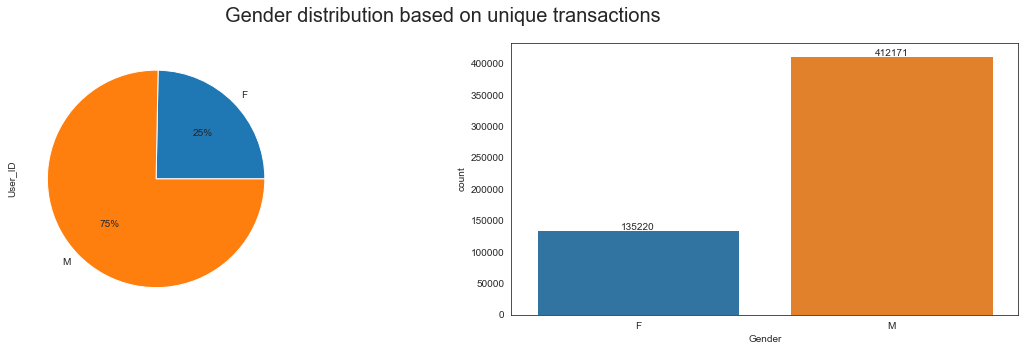

In [141]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Gender distribution based on unique transactions', fontsize=20)

plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
df.groupby('Gender')['User_ID'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%');
plt.subplot(122)
sns.countplot(data = df, x = 'Gender');
addlabels(df.groupby('Gender')['User_ID'].count().index, df.groupby('Gender')['User_ID'].count().tolist())

In [151]:
m_uTransaction_5k = sample_mean_calculator(maleUniqueTransactionsValues, 1000, 5000)

In [152]:
f_uTransaction_5k = sample_mean_calculator(femaleUniqueTransactionsValues, 1000, 5000)

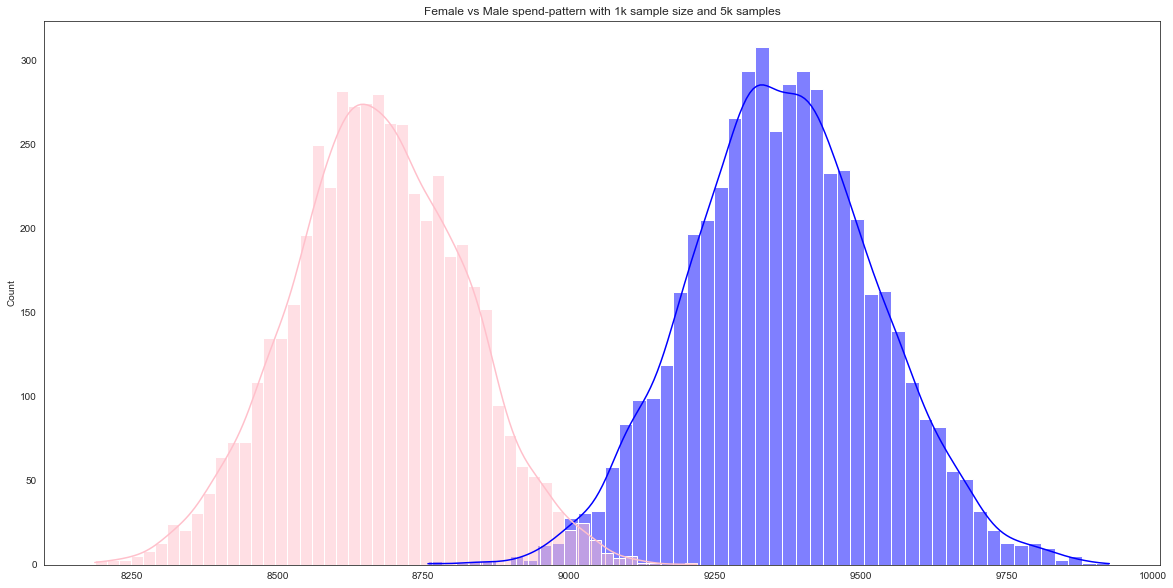

In [153]:
plt.figure(figsize=(20, 10))
sns.histplot(m_uTransaction_5k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(f_uTransaction_5k, bins=50, kde=True, legend=True, color='pink').set(title='Female vs Male spend-pattern with 1k sample size and 5k samples');

In [142]:
 m_uTransaction_10k = sample_mean_calculator(maleUniqueTransactionsValues, 1000, 10000)

In [149]:
 f_uTransaction_10k = sample_mean_calculator(femaleUniqueTransactionsValues, 1000, 10000)

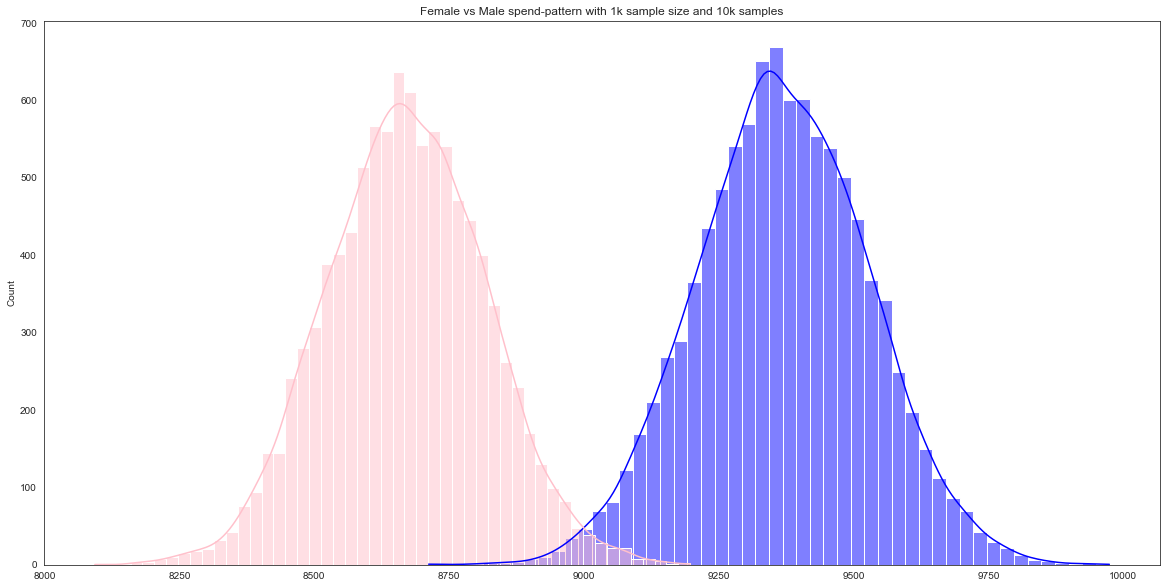

In [154]:
plt.figure(figsize=(20, 10))
sns.histplot(m_uTransaction_10k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(f_uTransaction_10k, bins=50, kde=True, legend=True, color='pink').set(title='Female vs Male spend-pattern with 1k sample size and 10k samples');

## Computing 95% Confidence interval levels for Female and Male purchase values by considering 10k samples-


In [158]:
print( '95% CI range for Female users: (', np.percentile( f_uTransaction_10k, 5), ",", np.percentile( f_uTransaction_10k, 95) ,")")
print( '95% CI range for Male users:   (', np.percentile( m_uTransaction_10k, 5), ",", np.percentile( m_uTransaction_10k, 95) ,")")

95% CI range for Female users: ( 8430.0 , 8908.0 )
95% CI range for Male users:   ( 9105.0 , 9627.0 )


## <span style='color:green '> Insights: Considering data by Unique transactions- </span>
*  <span style='color:green '> with 95% confidence, Mean-purchase value of 50 million Female users/transaction can lie between (8.4k-8.9k),  </span>
*  <span style='color:green '> with 95% confidence, Mean-purchase value of 50 million Male users/trasaction can lie between (9.1k-9.6k) </span>

---
---
# 'Marital_status' spend pattern  analysis

## <span style='background:yellow'> Analysis on the spending pattern of "Marital_status" based on 'Unique users'</span>

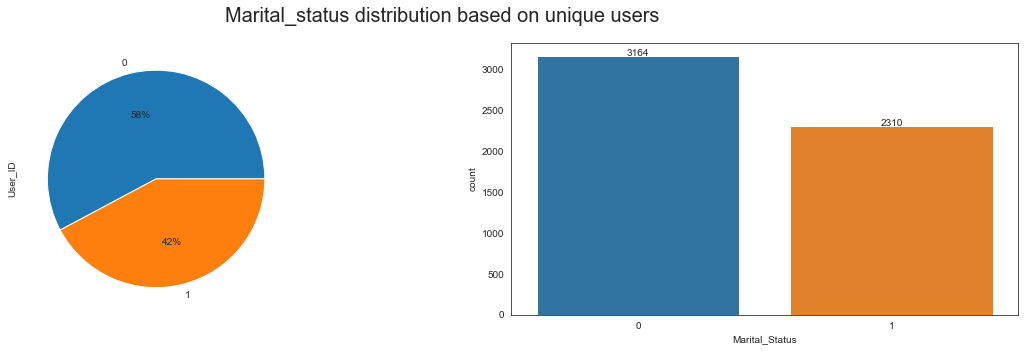

In [166]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Marital_status distribution based on unique users', fontsize=20)

plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
uniqueUsers_df.groupby('Marital_Status')['User_ID'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%');
plt.subplot(122)
sns.countplot(data = uniqueUsers_df, x = 'Marital_Status');
addlabels(uniqueUsers_df.groupby('Marital_Status')['User_ID'].count().index, uniqueUsers_df.groupby('Marital_Status')['User_ID'].count().tolist())

0 - Unmarried, 
1 - Married

In [170]:
unmarried_purchaseValues = uniqueUsers_df[uniqueUsers_df.Marital_Status == 0]['Purchase'].to_list()

In [172]:
married_purchaseValues = uniqueUsers_df[uniqueUsers_df.Marital_Status == 1]['Purchase'].to_list()

### use Central limit theorem with a sample size of 1k for samples of  5k, 10k

In [177]:
unmarriedSamples5k = sample_mean_calculator(unmarried_purchaseValues, 1000, 5000)

In [178]:
marriedSamples5k = sample_mean_calculator(married_purchaseValues, 1000, 5000)

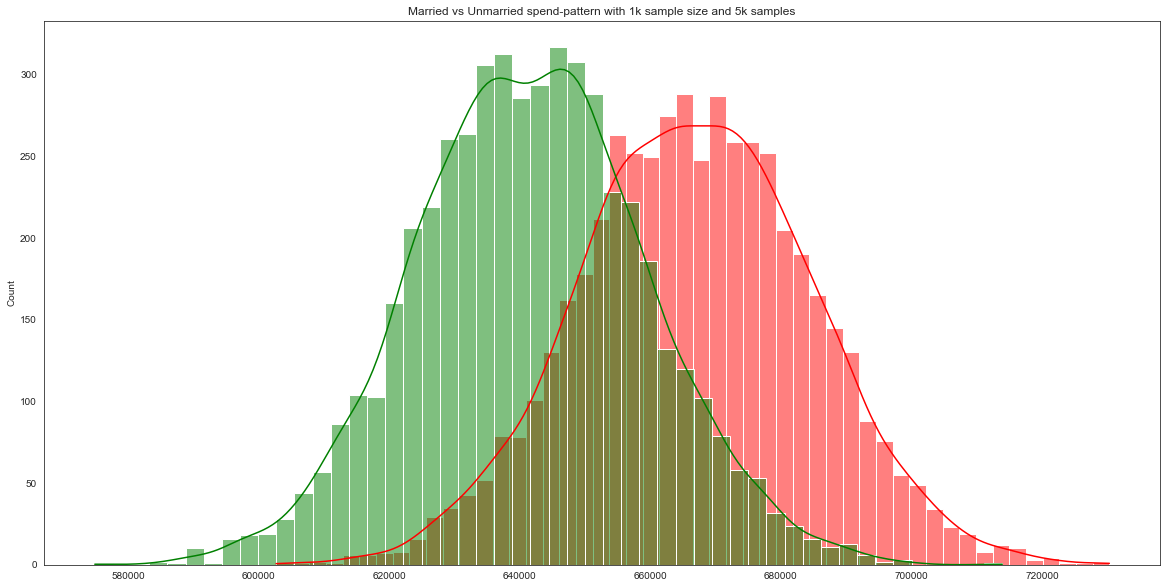

In [190]:
plt.figure(figsize=(20, 10))
sns.histplot(unmarriedSamples5k, bins=50, kde=True, legend=True, color='red')
sns.histplot(marriedSamples5k, bins=50, kde=True, legend=True, color='green').set(title='Married vs Unmarried spend-pattern with 1k sample size and 5k samples');

In [189]:
unmarriedSamples10k = sample_mean_calculator(unmarried_purchaseValues, 1000, 10000)

In [191]:
marriedSamples10k = sample_mean_calculator(married_purchaseValues, 1000, 10000)

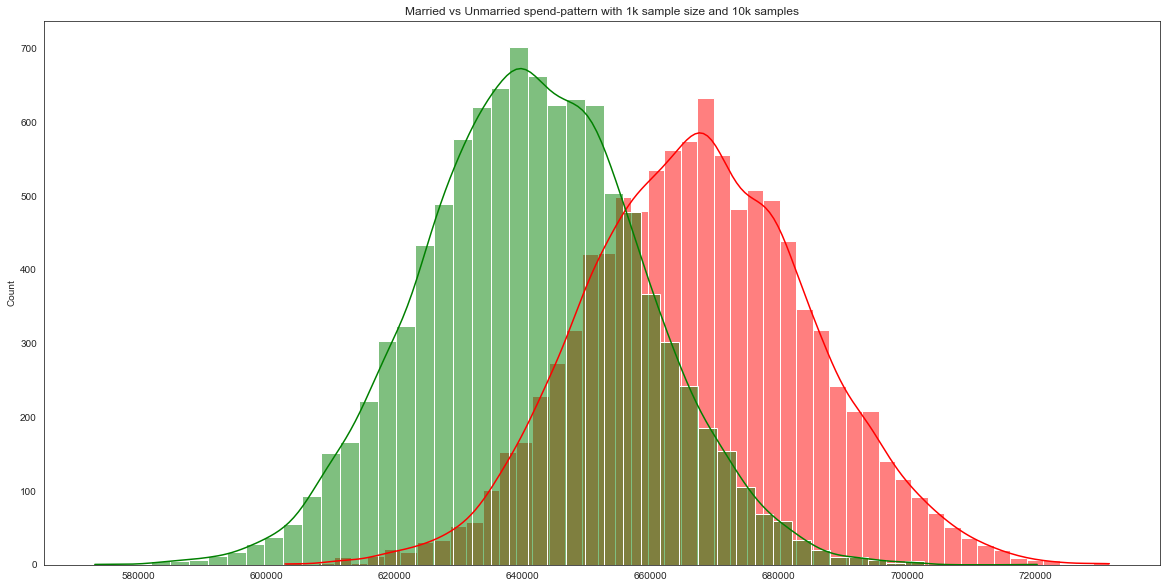

In [192]:
plt.figure(figsize=(20, 10))
sns.histplot(unmarriedSamples10k, bins=50, kde=True, legend=True, color='red')
sns.histplot(marriedSamples10k, bins=50, kde=True, legend=True, color='green').set(title='Married vs Unmarried spend-pattern with 1k sample size and 10k samples');

In [194]:
print( '95% CI range for Married users: (', np.percentile( marriedSamples10k, 5), ",", np.percentile( marriedSamples10k, 95) ,")")
print( '95% CI range for Unmarried users:(', np.percentile( unmarriedSamples10k, 5), ",", np.percentile( unmarriedSamples10k, 95) ,")")

95% CI range for Married users: ( 613111.25 , 669862.0499999999 )
95% CI range for Unmarried users:( 639062.15 , 696929.1 )


### <span style='color:green '> Although it looks like Unmarried users spend more than Married users, we cannot extrapolate the mean value of the population as there is a significant overlap between these distributions</span>


## <span style='background:yellow'> Analysis on the spending pattern of "Marital_status" based on 'Unique transactions'</span>

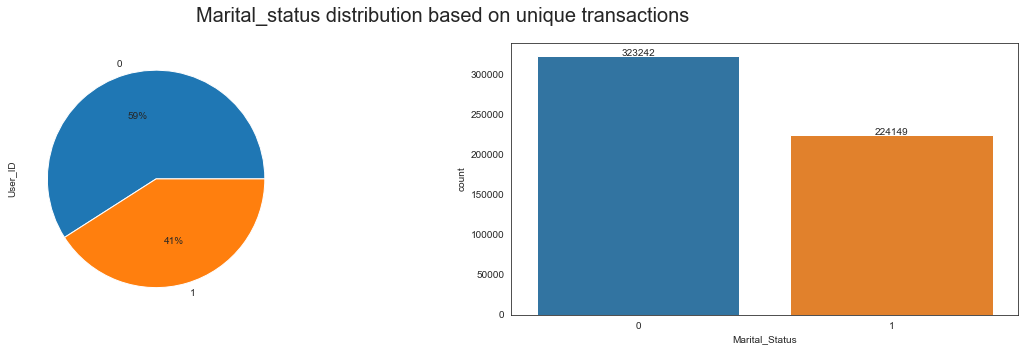

In [199]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Marital_status distribution based on unique transactions', fontsize=20)

plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
df.groupby('Marital_Status')['User_ID'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%');
plt.subplot(122)
sns.countplot(data = df, x = 'Marital_Status');
addlabels(df.groupby('Marital_Status')['User_ID'].count().index, df.groupby('Marital_Status')['User_ID'].count().tolist())

In [202]:
unmarried_ut_purchaseValues = df[df.Marital_Status == 0]['Purchase'].to_list()
married_ut_purchaseValues = df[df.Marital_Status == 1]['Purchase'].to_list()

In [203]:
unmarried_ut_samples5k = sample_mean_calculator(unmarried_ut_purchaseValues, 1000, 5000)

In [204]:
married_ut_samples5k = sample_mean_calculator(married_ut_purchaseValues, 1000, 5000)

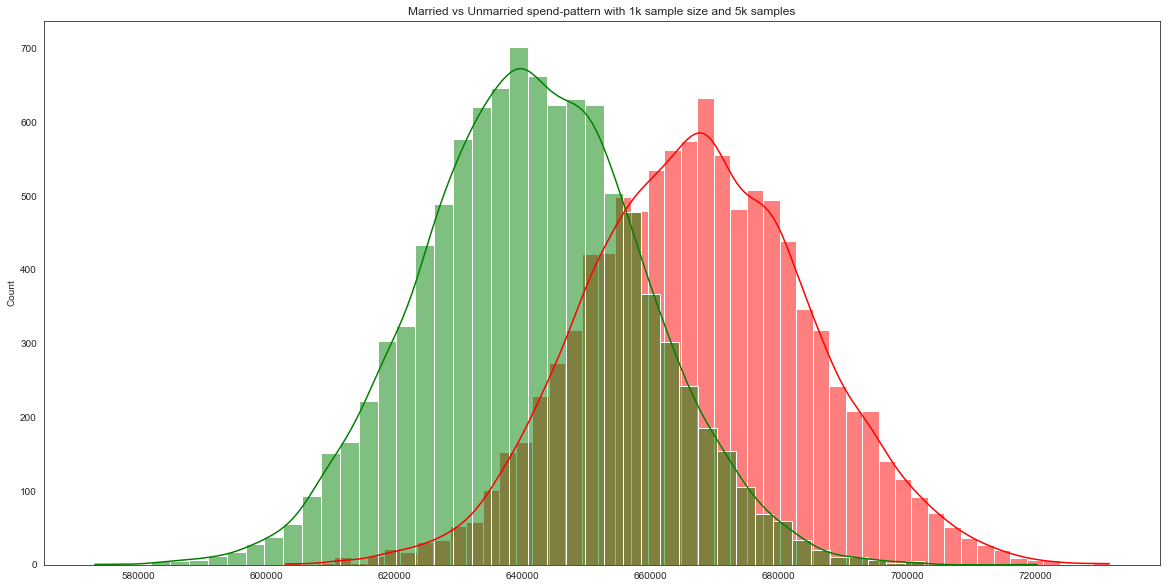

In [205]:
plt.figure(figsize=(20, 10))
sns.histplot(unmarriedSamples10k, bins=50, kde=True, legend=True, color='red')
sns.histplot(marriedSamples10k, bins=50, kde=True, legend=True, color='green').set(title='Married vs Unmarried spend-pattern with 1k sample size and 5k samples');

In [206]:
print( '95% CI range for Married users: (', np.percentile( married_ut_samples5k, 5), ",", np.percentile( married_ut_samples5k, 95) ,")")
print( '95% CI range for Unmarried users:(', np.percentile( unmarried_ut_samples5k, 5), ",", np.percentile( unmarried_ut_samples5k, 95) ,")")

95% CI range for Married users: ( 8925.0 , 9441.0 )
95% CI range for Unmarried users:( 8938.95 , 9462.0 )


### <span style='color:green '> Although it looks like Unmarried users spend more than Married users per transactions, we cannot extrapolate the mean value of the population as there is a significant overlap between these distributions</span>


---
---

# 'Age groups' spend pattern analysis 

## <span style='background:yellow'> Analysis on the spending pattern of "Age groups" based on 'Unique transactions'</span>

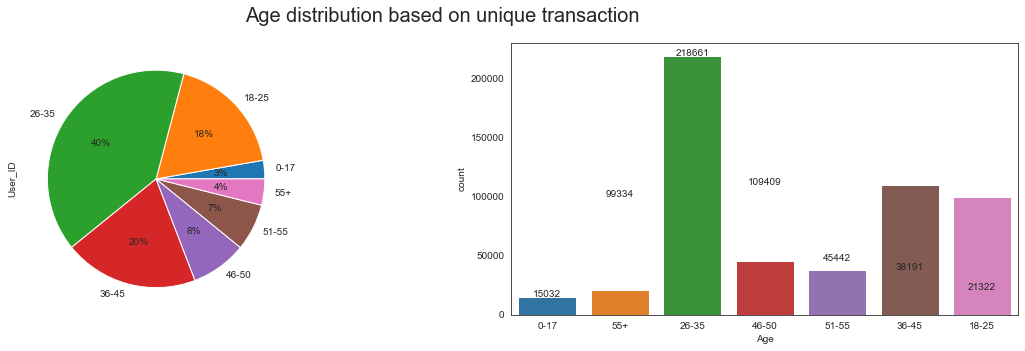

In [238]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Age distribution based on unique transaction', fontsize=20)

plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
df.groupby('Age')['User_ID'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%');
plt.subplot(122)
sns.countplot(data = df, x = 'Age');
addlabels(df.groupby('Age')['User_ID'].count().index, df.groupby('Age')['User_ID'].count().tolist())

In [235]:
u_agegroup1_purchaseValues = df[df.Age == '0-17']['Purchase'].to_list()
u_agegroup2_purchaseValues = df[df.Age == '18-25']['Purchase'].to_list()
u_agegroup3_purchaseValues = df[df.Age == '26-35']['Purchase'].to_list()
u_agegroup4_purchaseValues = df[df.Age == '36-45']['Purchase'].to_list()
u_agegroup5_purchaseValues = df[df.Age == '46-50']['Purchase'].to_list()
u_agegroup6_purchaseValues = df[df.Age == '51-55']['Purchase'].to_list()
u_agegroup7_purchaseValues = df[df.Age == '55+']['Purchase'].to_list()

In [236]:
u_agegroup1_samples5k = sample_mean_calculator(u_agegroup1_purchaseValues, 500, 5000)
u_agegroup2_samples5k = sample_mean_calculator(u_agegroup2_purchaseValues, 500, 5000)
u_agegroup3_samples5k = sample_mean_calculator(u_agegroup3_purchaseValues, 500, 5000)
u_agegroup4_samples5k = sample_mean_calculator(u_agegroup4_purchaseValues, 500, 5000)
u_agegroup5_samples5k = sample_mean_calculator(u_agegroup5_purchaseValues, 500, 5000)
u_agegroup6_samples5k = sample_mean_calculator(u_agegroup6_purchaseValues, 500, 5000)
u_agegroup7_samples5k = sample_mean_calculator(u_agegroup7_purchaseValues, 500, 5000)

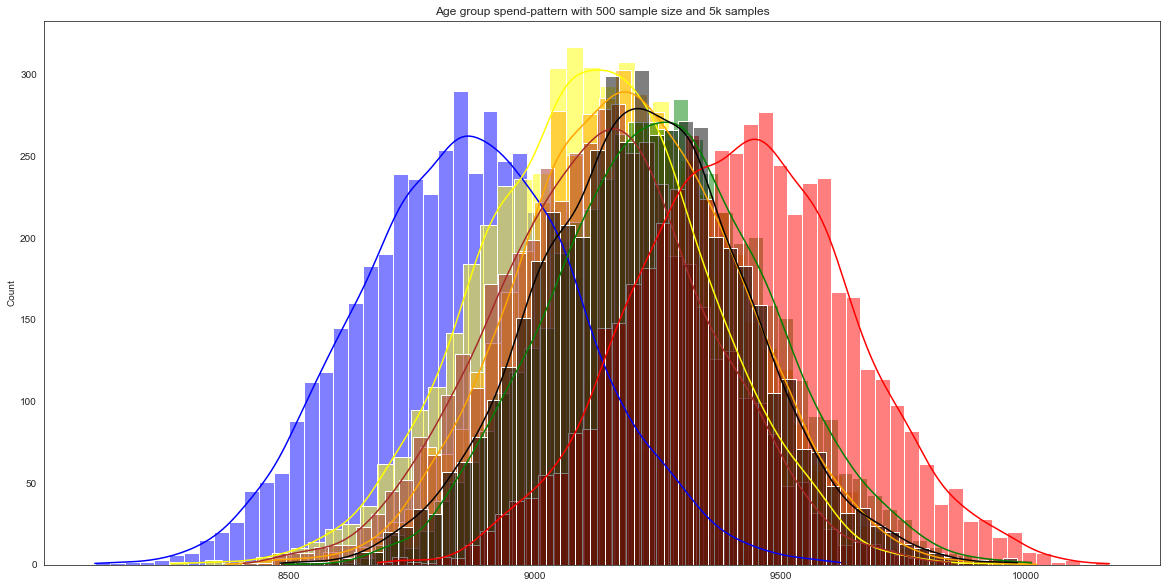

In [239]:
plt.figure(figsize=(20, 10))
sns.histplot(u_agegroup1_samples5k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(u_agegroup2_samples5k, bins=50, kde=True, legend=True, color='yellow')
sns.histplot(u_agegroup3_samples5k, bins=50, kde=True, legend=True, color='orange')
sns.histplot(u_agegroup4_samples5k, bins=50, kde=True, legend=True, color='green')
sns.histplot(u_agegroup5_samples5k, bins=50, kde=True, legend=True, color='brown')
sns.histplot(u_agegroup6_samples5k, bins=50, kde=True, legend=True, color='red')
sns.histplot(u_agegroup7_samples5k, bins=50, kde=True, legend=True, color='black').set(title='Age group spend-pattern with 500 sample size and 5k samples');

 ### <span style='color:green '> Conclusive decision cannot be taken due to significant overlapping distributions between age groups</span>

## <span style='background:yellow'> Analysis on the spending pattern of "Age groups" based on 'Unique users'</span>

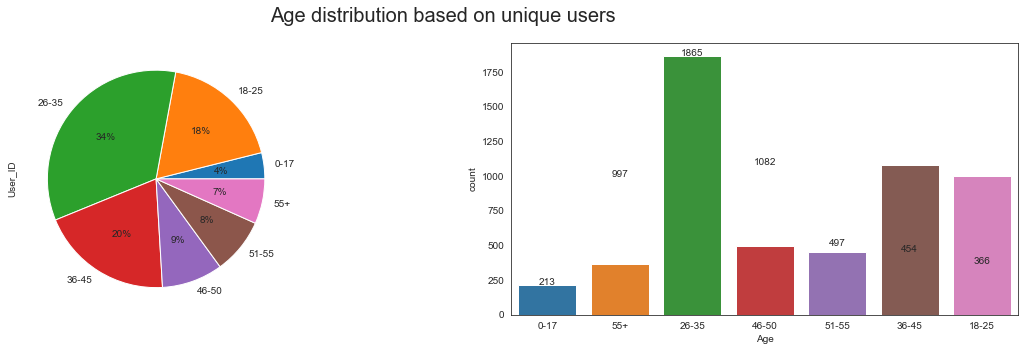

In [210]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Age distribution based on unique users', fontsize=20)

plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
uniqueUsers_df.groupby('Age')['User_ID'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%');
plt.subplot(122)
sns.countplot(data = uniqueUsers_df, x = 'Age');
addlabels(uniqueUsers_df.groupby('Age')['User_ID'].count().index, uniqueUsers_df.groupby('Age')['User_ID'].count().tolist())

In [217]:
agegroup1_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '0-17']['Purchase'].to_list()
agegroup2_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '18-25']['Purchase'].to_list()
agegroup3_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '26-35']['Purchase'].to_list()
agegroup4_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '36-45']['Purchase'].to_list()
agegroup5_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '46-50']['Purchase'].to_list()
agegroup6_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '51-55']['Purchase'].to_list()
agegroup7_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '55+']['Purchase'].to_list()


In [218]:
agegroup1_samples = sample_mean_calculator(agegroup1_purchaseValues, 300, 1000)
agegroup2_samples = sample_mean_calculator(agegroup2_purchaseValues, 300, 1000)
agegroup3_samples = sample_mean_calculator(agegroup3_purchaseValues, 300, 1000)
agegroup4_samples = sample_mean_calculator(agegroup4_purchaseValues, 300, 1000)
agegroup5_samples = sample_mean_calculator(agegroup5_purchaseValues, 300, 1000)
agegroup6_samples = sample_mean_calculator(agegroup6_purchaseValues, 300, 1000)
agegroup7_samples = sample_mean_calculator(agegroup7_purchaseValues, 300, 1000)


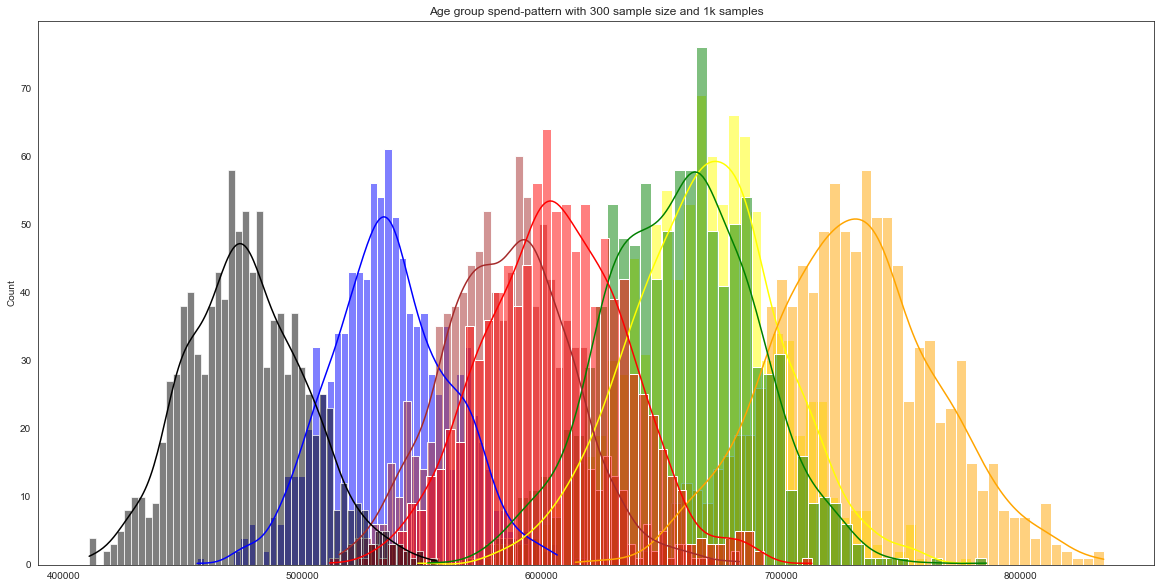

In [230]:
plt.figure(figsize=(20, 10))
sns.histplot(agegroup1_samples, bins=50, kde=True, legend=True, color='blue')
sns.histplot(agegroup2_samples, bins=50, kde=True, legend=True, color='yellow')
sns.histplot(agegroup3_samples, bins=50, kde=True, legend=True, color='orange')
sns.histplot(agegroup4_samples, bins=50, kde=True, legend=True, color='green')
sns.histplot(agegroup5_samples, bins=50, kde=True, legend=True, color='brown')
sns.histplot(agegroup6_samples, bins=50, kde=True, legend=True, color='red')
sns.histplot(agegroup7_samples, bins=50, kde=True, legend=True, color='black').set(title='Age group spend-pattern with 300 sample size and 1k samples');

In [226]:
agegroup1_samples3k = sample_mean_calculator(agegroup1_purchaseValues, 500, 5000)
agegroup2_samples3k = sample_mean_calculator(agegroup2_purchaseValues, 500, 5000)
agegroup3_samples3k = sample_mean_calculator(agegroup3_purchaseValues, 500, 5000)
agegroup4_samples3k = sample_mean_calculator(agegroup4_purchaseValues, 500, 5000)
agegroup5_samples3k = sample_mean_calculator(agegroup5_purchaseValues, 500, 5000)
agegroup6_samples3k = sample_mean_calculator(agegroup6_purchaseValues, 500, 5000)
agegroup7_samples3k = sample_mean_calculator(agegroup7_purchaseValues, 500, 5000)


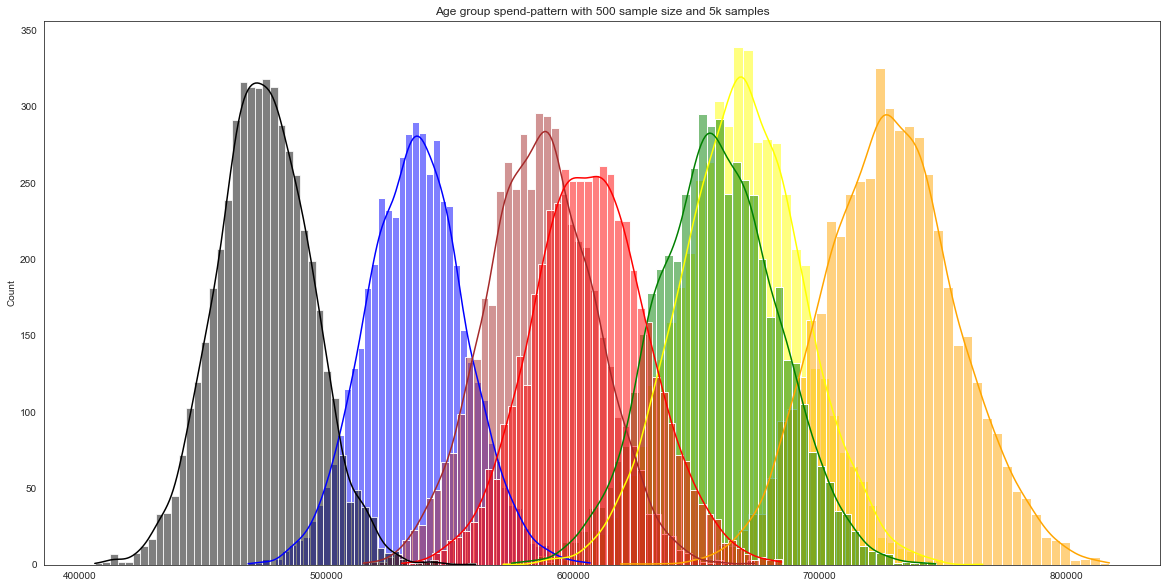

In [227]:
plt.figure(figsize=(20, 10))
sns.histplot(agegroup1_samples3k, bins=50, kde=True, legend=True, color='blue')
sns.histplot(agegroup2_samples3k, bins=50, kde=True, legend=True, color='yellow')
sns.histplot(agegroup3_samples3k, bins=50, kde=True, legend=True, color='orange')
sns.histplot(agegroup4_samples3k, bins=50, kde=True, legend=True, color='green')
sns.histplot(agegroup5_samples3k, bins=50, kde=True, legend=True, color='brown')
sns.histplot(agegroup6_samples3k, bins=50, kde=True, legend=True, color='red')
sns.histplot(agegroup7_samples3k, bins=50, kde=True, legend=True, color='black').set(title='Age group spend-pattern with 500 sample size and 5k samples');

# Computing CI for Age groups

In [243]:
print( '95% CI range for 0-17: (', np.percentile( agegroup1_samples3k, 5), ",", np.percentile( agegroup1_samples3k, 95) ,")")
print( '95% CI range for 18-25:(', np.percentile( agegroup2_samples3k, 5), ",", np.percentile( agegroup2_samples3k, 95) ,")")
print( '95% CI range for 26-35:(', np.percentile( agegroup3_samples3k, 5), ",", np.percentile( agegroup3_samples3k, 95) ,")")
print( '95% CI range for 36-45:(', np.percentile( agegroup4_samples3k, 5), ",", np.percentile( agegroup4_samples3k, 95) ,")")
print( '95% CI range for 46-50:(', np.percentile( agegroup5_samples3k, 5), ",", np.percentile( agegroup5_samples3k, 95) ,")")
print( '95% CI range for 51-55:(', np.percentile( agegroup6_samples3k, 5), ",", np.percentile( agegroup6_samples3k, 95) ,")")
print( '95% CI range for 55+:  (', np.percentile( agegroup7_samples3k, 5), ",", np.percentile( agegroup7_samples3k, 95) ,")")

95% CI range for 0-17: ( 504283.8 , 569161.0 )
95% CI range for 18-25:( 628110.6 , 710417.65 )
95% CI range for 26-35:( 685493.45 , 773965.65 )
95% CI range for 36-45:( 618868.0 , 698954.4 )
95% CI range for 46-50:( 550037.5 , 623838.8 )
95% CI range for 51-55:( 569910.25 , 645785.75 )
95% CI range for 55+:  ( 443757.45 , 505757.75 )


### <span style='color:green '> Least spending age groups: 55+, 0-17 </span>
### <span style='color:green '> Most spending age groups:  26-35, 18-25, 36-45</span>


# Insights & Recommendations:

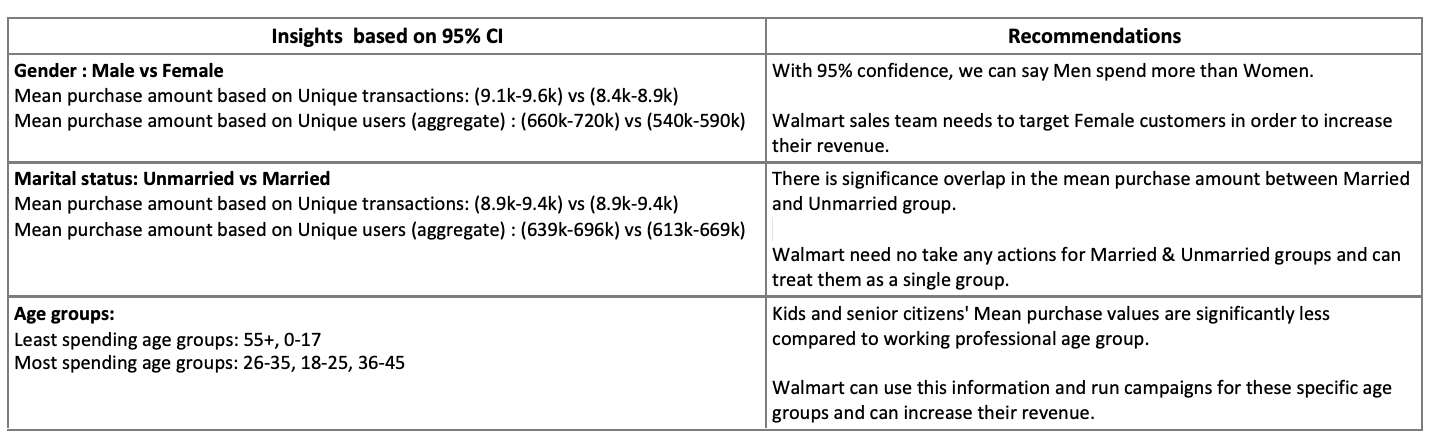